In [1]:
import os
import keras as ks
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, Convolution2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: GPU device not found

In [2]:
from keras.datasets import fashion_mnist as mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 11s 2us/step


In [4]:
train = X_train.copy()
test = X_test.copy()

In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
type(X_train)

numpy.ndarray

In [7]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
y_train.shape

(60000, 10)

## Optimizer

In [9]:
optimizer_Adam = Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
optimizer_SGD = SGD(lr=1e-4, decay=0.0005, momentum=0.9)
optimizer_RMS = RMSprop(lr=0.001, rho=0.7, epsilon=0.003, decay=0.0)

In [11]:
model = Sequential()
model.add(Conv2D(25,(3,3), activation='relu', dim_ordering='tf', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(50,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(100,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

/home/najet/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (3, 3), activation="relu", input_shape=(28, 28, 1..., data_format="channels_last")`
  


In [12]:
model.compile(optimizer= 'rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 25)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 50)        11300     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 50)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 100)         45100     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
__________

In [13]:
history = model.fit(X_train,y_train, epochs=30, batch_size = 256, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 58s 975us/step - loss: 0.8041 - acc: 0.7153 - val_loss: 0.6802 - val_acc: 0.7320
Epoch 2/30
60000/60000 [==============================] - 67s 1ms/step - loss: 0.5383 - acc: 0.8050 - val_loss: 0.5191 - val_acc: 0.8134
Epoch 3/30
60000/60000 [==============================] - 66s 1ms/step - loss: 0.4661 - acc: 0.8309 - val_loss: 0.5224 - val_acc: 0.8009
Epoch 4/30
60000/60000 [==============================] - 62s 1ms/step - loss: 0.4243 - acc: 0.8444 - val_loss: 0.4608 - val_acc: 0.8274
Epoch 5/30
60000/60000 [==============================] - 62s 1ms/step - loss: 0.3933 - acc: 0.8559 - val_loss: 0.4177 - val_acc: 0.8486
Epoch 6/30
60000/60000 [==============================] - 76s 1ms/step - loss: 0.3697 - acc: 0.8641 - val_loss: 0.4106 - val_acc: 0.8485
Epoch 7/30
60000/60000 [==============================] - 68s 1ms/step - loss: 0.3506 - acc: 0.8703 - val_loss: 0.4140 - val_a

## ** Graphic Visualization**

dict_keys(['val_acc', 'acc', 'loss', 'val_loss'])


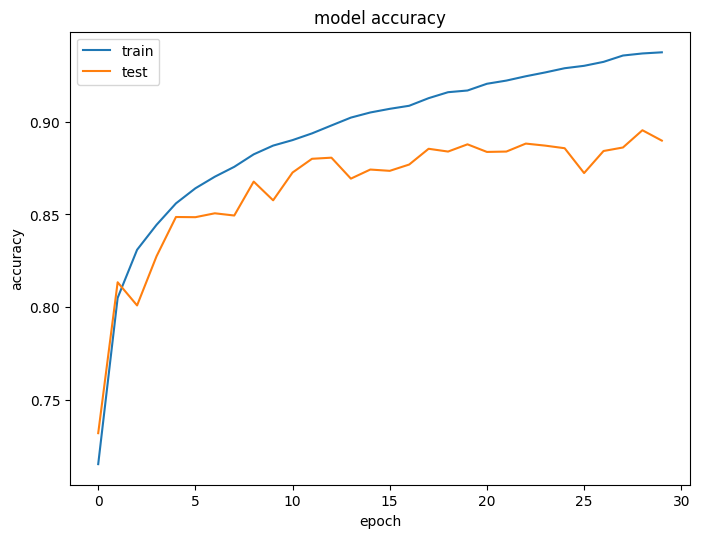

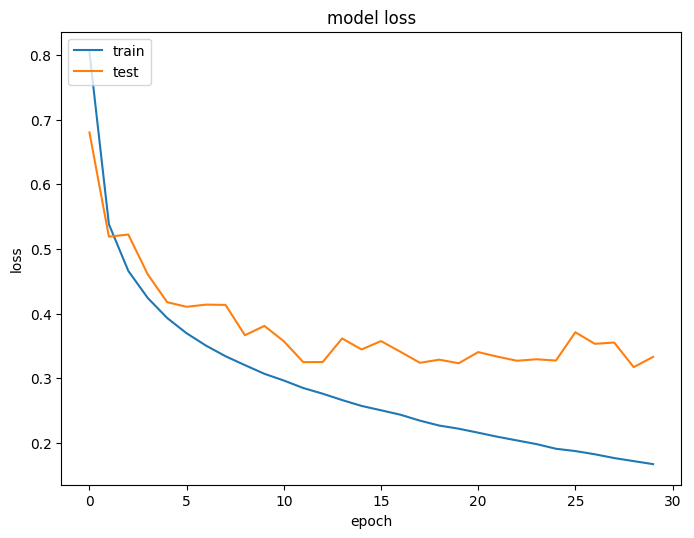

In [14]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(os.path.join('model accuracy 3.png'))
plt.show()
# summarize history for loss
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(os.path.join('model loss 3.png'))
plt.show()

### Hyperparemeter Search

In [15]:
def zolando_fashion(optimizer='rmsprop'):
  model = Sequential()
  model.add(Conv2D(25,(3,3), activation='relu', dim_ordering='tf', input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(50,(3,3), activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(100,(3,3), activation='relu'))
  model.add(Dropout(0.5))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model